# Econ 425T Homework 4

AUTHOR：Ruoxuan Yan

UID: 506082695

## 1. ISL Exercise 8.4.3

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/var/folders/40/nm8rgyd157j25gykdy7jhgbc0000gn/T/ipykernel_1705/1517430684.py:9: RuntimeWarning: divide by zero encountered in log
  y_entro = - x*np.log(x) - (1-x)*np.log(1-x)
/var/folders/40/nm8rgyd157j25gykdy7jhgbc0000gn/T/ipykernel_1705/1517430684.py:9: RuntimeWarning: invalid value encountered in multiply
  y_entro = - x*np.log(x) - (1-x)*np.log(1-x)


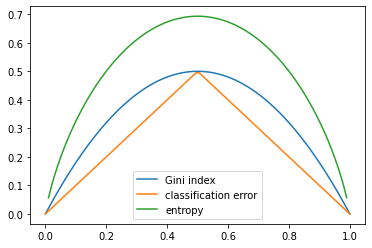

In [7]:
x = np.linspace(0, 1, num = 100)
y_gini = x*(1-x) + (1-x)*x
y_cerro = []
for i in x:
    if i <= 1-i:
        y_cerro.append(1 - (1-i))
    else:
        y_cerro.append(1 - i)
y_entro = - x*np.log(x) - (1-x)*np.log(1-x)
plt.plot(x, y_gini, label = 'Gini index')
plt.plot(x, y_cerro, label = 'classification error')
plt.plot(x, y_entro, label = 'entropy')
plt.legend()
plt.show()

## 2. ISL Exercise 8.4.4

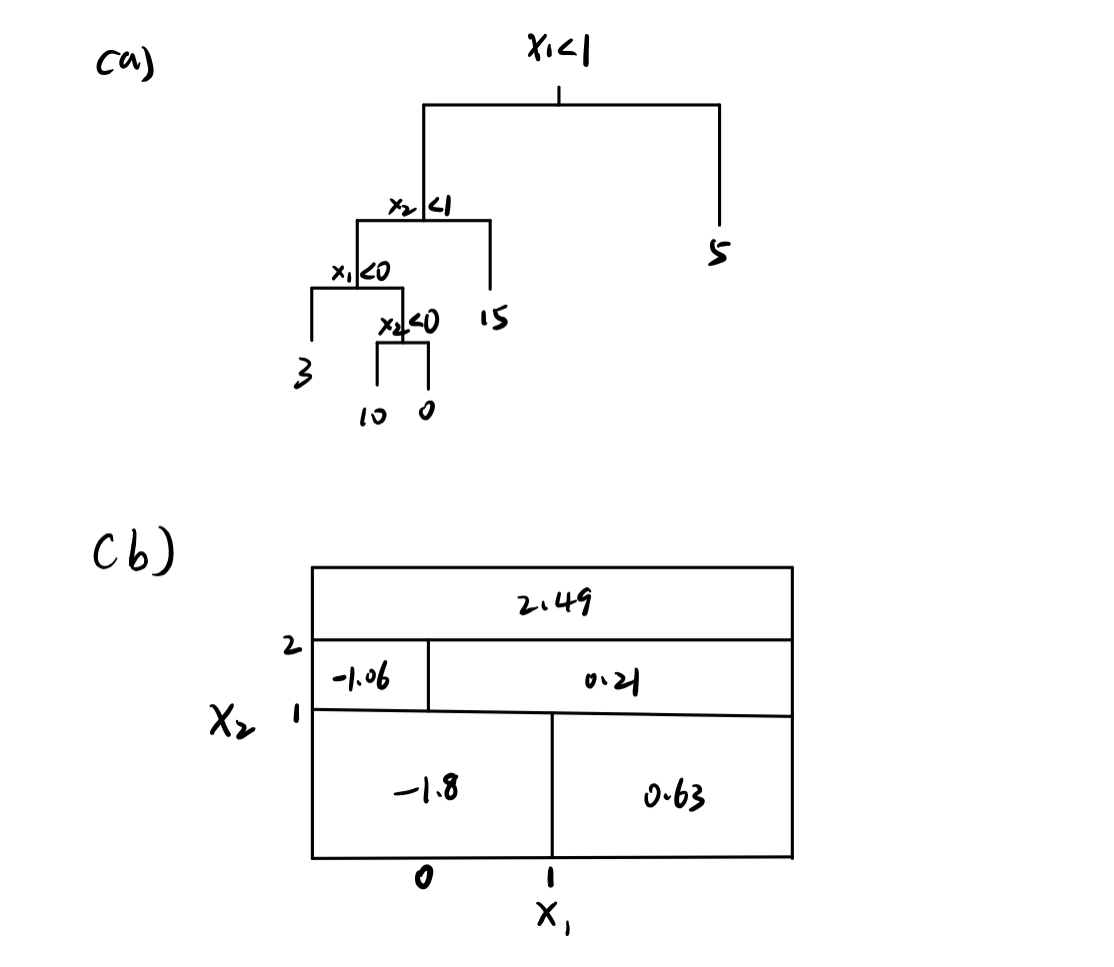

## 3. ISL Exercise 8.4.5

- Under the majority vote approach: The final classification will be Red. Because 6 of the 10 predictions classify it to be red, it's the most commonly occurring class.
- Under the average probability approach: The final classification will be Green. Because the average probability of these 10 predictions is 0.45. 

## 4. ISL Lab 8.3. Boston data set

In [3]:
import io
import requests

In [5]:
# Get the data
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
Boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [6]:
# Numerical summaries
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [7]:
# Describe the data
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# Split the data into training and testing set
    from sklearn.model_selection import train_test_split

Boston_train, Boston_test = train_test_split(
  Boston, 
  train_size = 0.5,
  random_state = 425, # seed
  )
print('Training set shape:', Boston_train.shape)
print('Testing set shape:', Boston_test.shape)

Training set shape: (253, 13)
Testing set shape: (253, 13)


In [9]:
# Separate X and y

# Training X and y
X_train = Boston_train.drop('crim', axis = 1)
y_train = Boston_train.crim

# Testing X and y
X_test = Boston_test.drop('crim', axis = 1)
y_test = Boston_test.crim

In [10]:
features = X_train.columns
features

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

### Regression tree

In [11]:
# Model
from sklearn.tree import DecisionTreeRegressor, plot_tree

regtree_mod = DecisionTreeRegressor(random_state = 425)

In [12]:
# Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", regtree_mod)
  ])
pipe

Pipeline(steps=[('model', DecisionTreeRegressor(random_state=425))])

In [13]:
# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.1, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }
tuned_parameters 

{'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
        0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
        0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
        0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
        0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02424242,
        0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293,
        0.03030303, 0.03131313, 0.03232323, 0.03333333, 0.03434343,
        0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394,
        0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
        0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
        0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
        0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596,
        0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646,
        0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
        0.07070707, 0.071717

In [14]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [15]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.020202...
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474747,
       0.07575758, 0.07676768, 0.07777778, 0.07878788, 0.07979798,
       0.08080808, 0.08181818, 0.08282828, 0.08383838, 0.08484848,
       0.08585859, 0.08686869, 0.08787879, 0.08888889, 0.08989899,
       0.09090909, 0.09191919, 0.09292929, 0.09393939, 0.09494949,
       0.0959596 , 0.0969697 , 0.0979798 , 0.0989899 , 0.1       ])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

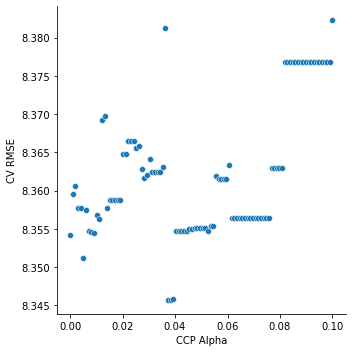

In [16]:
# Visualize CV results
cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "rmse": -search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "rmse"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV RMSE"
);

In [17]:
# Best CV RMSE
-search.best_score_

8.34570294639631

In [18]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.03737373737373737,
                                       random_state=425))])

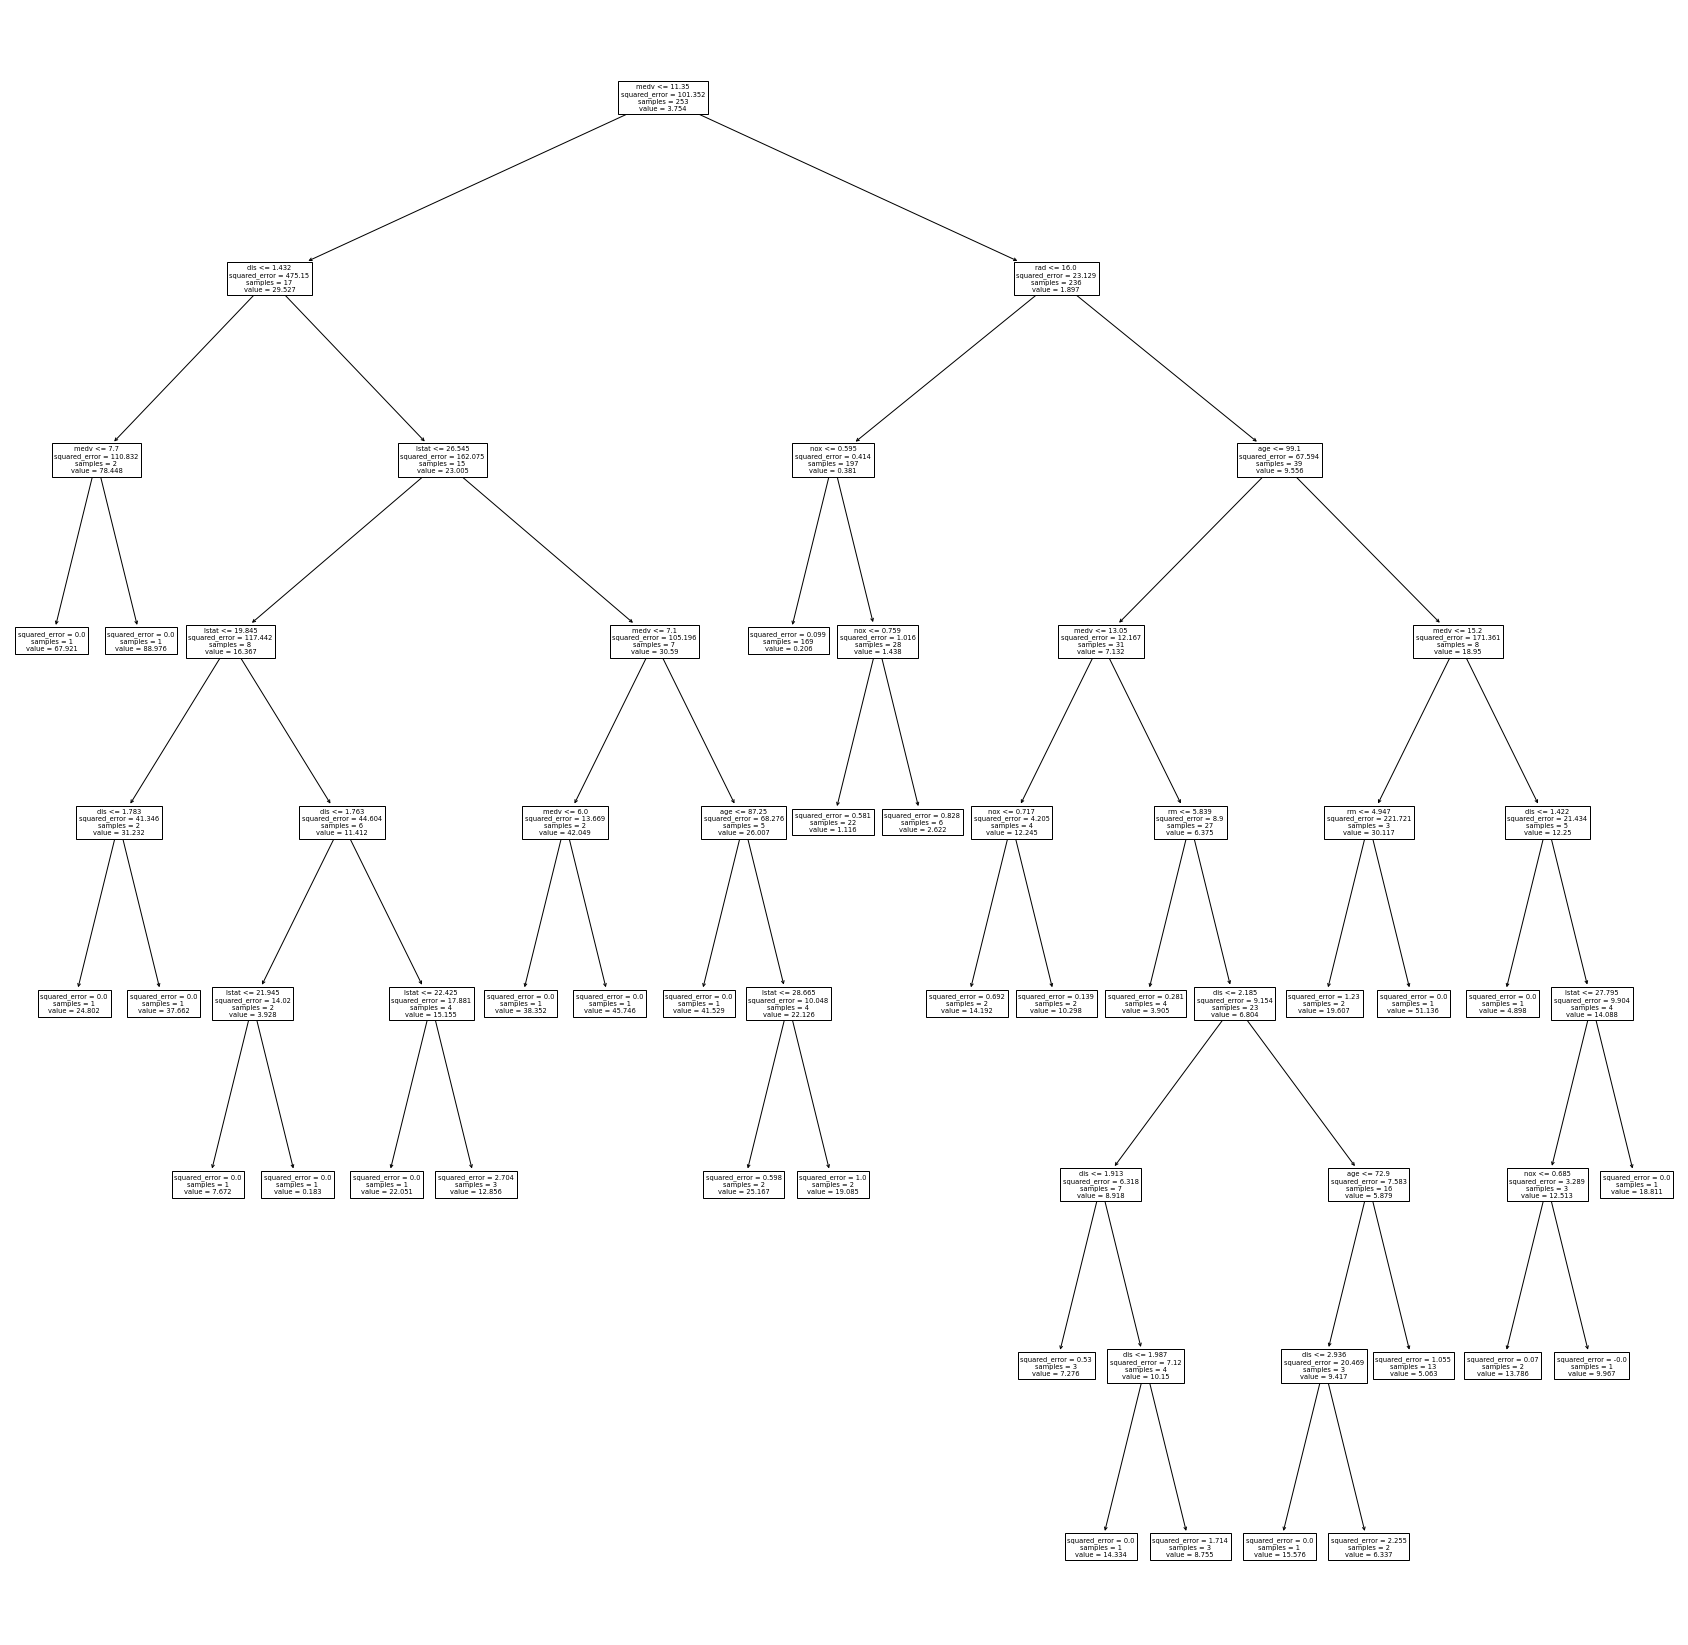

In [19]:
# Visualize the best regression tree
plt.figure(figsize=(30,30))
plot_tree(
  search.best_estimator_['model'],
  feature_names = features
  );
plt.show()

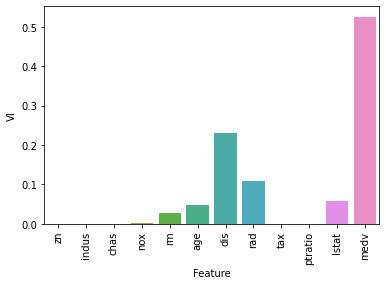

In [20]:
# Feature importances 
vi_df = pd.DataFrame({
  "feature": features,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "VI"
);
plt.xticks(rotation = 90);
plt.show()

In [21]:
# Final prediction RMSE on the test set
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

8.672186725641556

### Random forest

In [36]:
# Model
from sklearn.ensemble import RandomForestRegressor

rf_mod =  RandomForestRegressor(
  # Number of trees
  n_estimators = 100, 
  criterion = 'squared_error',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [37]:
# Pipeline
pipe = Pipeline(steps = [
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', oob_score=True,
                                       random_state=425))])

In [38]:
# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters

{'model__n_estimators': [50, 100, 150, 200, 250, 300],
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [39]:
# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [41]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(max_features='sqrt',
                                                              oob_score=True,
                                                              random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

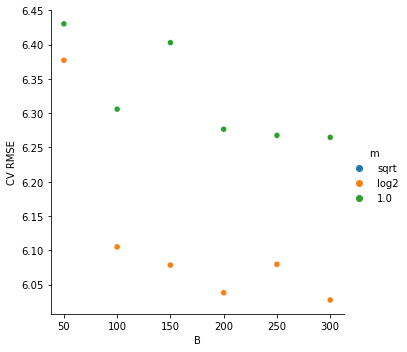

In [45]:
# Visualize CV results
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "m",
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [43]:
# Best CV RMSE
-search.best_score_

6.027482249951716

In [44]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300,
                                       oob_score=True, random_state=425))])

<Figure size 432x288 with 0 Axes>

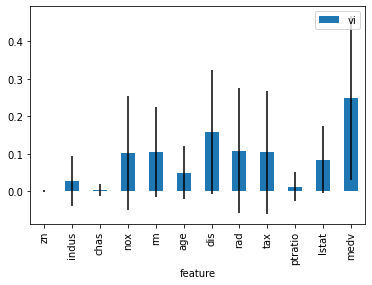

In [47]:
# Feature importances 
vi_df = pd.DataFrame({
  "feature": features,
  "vi": search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90);
plt.show()

In [48]:
# Final prediction RMSE on the test set
mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

5.613025889220564

### Boosting 

In [50]:
# Model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

bst_mod =  AdaBoostRegressor(
  # Default base estimator is DecisionTreeRegressor with max_depth = 3
  base_estimator = DecisionTreeRegressor(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

In [51]:
# Pipeline
pipe = Pipeline(steps = [
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   random_state=425))])

In [55]:
# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = [50, 100, 150, 200, 250, 300, 350, 400]
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters  

{'model__base_estimator': [DecisionTreeRegressor(max_depth=1),
  DecisionTreeRegressor(max_depth=2),
  DecisionTreeRegressor(max_depth=3),
  DecisionTreeRegressor(max_depth=4)],
 'model__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
 'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

In [56]:
# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [57]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                                          random_state=425))]),
             param_grid={'model__base_estimator': [DecisionTreeRegressor(max_depth=1),
                                                   DecisionTreeRegressor(max_depth=2),
                                                   DecisionTreeRegressor(max_depth=3),
                                                   DecisionTreeRegressor(max_depth=4)],
                         'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300,
                                                 350, 400]},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

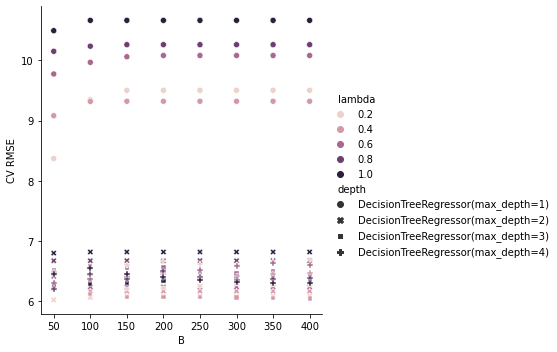

In [59]:
# Visualize CV results
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [60]:
# Best CV RMSE
-search.best_score_

6.020496813253289

In [62]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=0.2, random_state=425))])

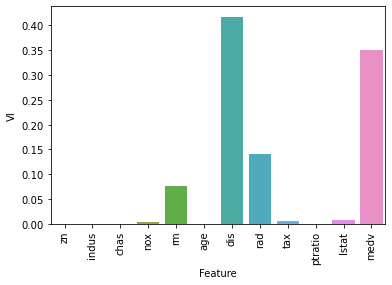

In [64]:
# Feature importances 
vi_df = pd.DataFrame({
  "feature": features,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "VI"
);
plt.xticks(rotation = 90);
plt.show()

In [65]:
# Final prediction RMSE on the test set
mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

6.562222675346282

So the out-of-sample performance on the test set evaluated by prediction RMSE for regression tree, random forest, and boosting methods are 8.67, 5.61 and 6.56 respectively, it seems that random forest performs best on this dataset.

## 5. ISL Lab 8.3 Carseats data set

In [85]:
# Get the data
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Carseats.csv"
s = requests.get(url).content
Carseats = pd.read_csv(io.StringIO(s.decode('utf-8')))
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [86]:
# Numerical summaries
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [87]:
# Describe the data
Carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [88]:
# Create a classification variable
Carseats["High"] = np.where(Carseats["Sales"] >= 8, 'Yes', 'No')

In [89]:
# Split the data into training and testing set

Carseats_train, Carseats_test = train_test_split(
  Carseats, 
  train_size = 0.75,
  random_state = 425, # seed
  )
print('Training set shape:', Carseats_train.shape)
print('Testing set shape:', Carseats_test.shape)

Training set shape: (300, 12)
Testing set shape: (100, 12)


In [147]:
cat_features = ['ShelveLoc', 'Urban', 'US']
cat_features

['ShelveLoc', 'Urban', 'US']

In [148]:
num_features = Carseats_train.drop(['Sales','High', 'ShelveLoc', 'Urban', 'US'], axis = 1).columns
num_features

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')

In [167]:
features = np.concatenate([num_features, cat_features])
features

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc', 'Urban', 'US'], dtype=object)

In [150]:
# Separate X and y

# Training X and y
X_train = Carseats_train[features]
y_train = Carseats_train.High

# Testing X and y
X_test = Carseats_test[features]
y_test = Carseats_test.High

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transform categorical predictors
categorical_tf = Pipeline(steps = [
  ("cat_impute", SimpleImputer(strategy = 'most_frequent')),
  ("encoder", OneHotEncoder())
])

# Transformer for continuous variables
numeric_tf = Pipeline(steps = [
  ("num_impute", SimpleImputer(strategy = 'mean')),
])

# Column transformer
col_tf = ColumnTransformer(transformers = [
  ('num', numeric_tf, num_features),
  ('cat', categorical_tf, cat_features)
])

### Classification tree

In [153]:
# Model
from sklearn.tree import DecisionTreeClassifier, plot_tree

classtree_mod = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 425
  )

In [154]:
# Pipeline
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", classtree_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model', Decis

In [155]:
# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.05, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }
tuned_parameters 

{'model__ccp_alpha': array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
        0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00454545,
        0.00505051, 0.00555556, 0.00606061, 0.00656566, 0.00707071,
        0.00757576, 0.00808081, 0.00858586, 0.00909091, 0.00959596,
        0.01010101, 0.01060606, 0.01111111, 0.01161616, 0.01212121,
        0.01262626, 0.01313131, 0.01363636, 0.01414141, 0.01464646,
        0.01515152, 0.01565657, 0.01616162, 0.01666667, 0.01717172,
        0.01767677, 0.01818182, 0.01868687, 0.01919192, 0.01969697,
        0.02020202, 0.02070707, 0.02121212, 0.02171717, 0.02222222,
        0.02272727, 0.02323232, 0.02373737, 0.02424242, 0.02474747,
        0.02525253, 0.02575758, 0.02626263, 0.02676768, 0.02727273,
        0.02777778, 0.02828283, 0.02878788, 0.02929293, 0.02979798,
        0.03030303, 0.03080808, 0.03131313, 0.03181818, 0.03232323,
        0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
        0.03535354, 0.035858

In [156]:
# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [157]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer())]),
                                                                         Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                           

<Figure size 432x288 with 0 Axes>

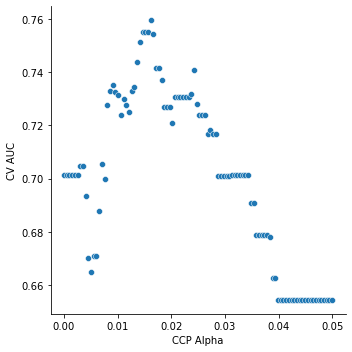

In [158]:
# Visualize CV results
cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "auc": search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "auc"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV AUC"
);
plt.show()

In [159]:
# Best CV AUC
search.best_score_

0.7594638116377247

In [160]:
# Training accuracy 
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

0.88

In [161]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
     

In [162]:
# Get feature names
best_estimator = search.best_estimator_
cat_encoder = best_estimator.named_steps['col_tf'].named_transformers_['cat'].named_steps['encoder']
cat_encoder.get_feature_names(cat_features).tolist()

/Users/ireneyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

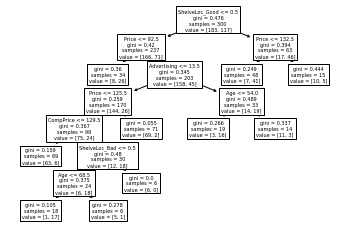

In [168]:
# Visualize the best regression tree
features_new = np.concatenate([
    features[:-3], 
    ['ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No'],
    ['Urban_Yes', 'US_No', 'US_Yes']
    ])

plt.figure()
plot_tree(
  search.best_estimator_['model'],
  feature_names = features_new
  );
plt.show()

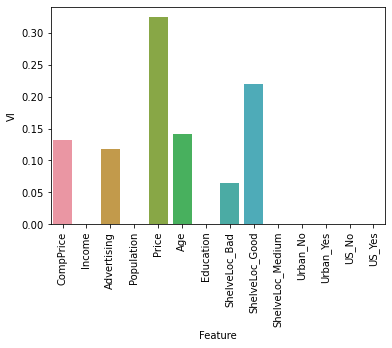

In [169]:
# Feature importances 
vi_df = pd.DataFrame({
  "feature": features_new,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "VI"
);
plt.xticks(rotation = 90);
plt.show()

In [165]:
# Final AUC on the test set
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.7342432757928543

In [166]:
# Final classification accuracy on the test set
accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.71

### Random forest

In [170]:
# Model
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(
  # Number of trees
  n_estimators = 100, 
  criterion = 'gini',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [171]:
# Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
     

In [172]:
# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters 

{'model__n_estimators': [50, 100, 150, 200, 250, 300],
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [173]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [174]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer())]),
                                                                         Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                           

<Figure size 432x288 with 0 Axes>

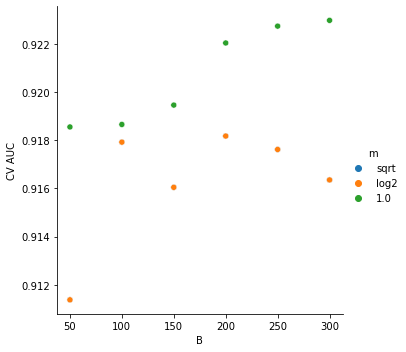

In [175]:
# Visualize CV results
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "auc": search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "auc",
  hue = "m"
  ).set(
    xlabel = "B",
    ylabel = "CV AUC"
);
plt.show()

In [176]:
# Best CV AUC
search.best_score_

0.9229781411846629

In [178]:
# Training accuracy
accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

1.0

In [179]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
     

In [180]:
# Get feature names
best_estimator = search.best_estimator_
cat_encoder = best_estimator.named_steps['col_tf'].named_transformers_['cat'].named_steps['encoder']
cat_encoder.get_feature_names(cat_features).tolist()

/Users/ireneyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

<Figure size 432x288 with 0 Axes>

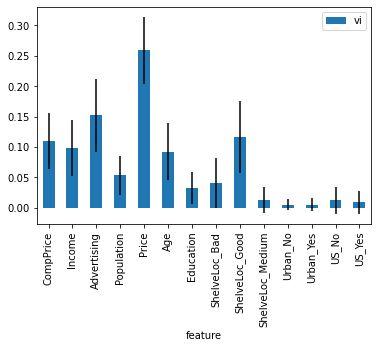

In [182]:
# Feature importances 
features_new = np.concatenate([
    features[:-3], 
    ['ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No'],
    ['Urban_Yes', 'US_No', 'US_Yes']
    ])

vi_df = pd.DataFrame({
  "feature": features_new,
  "vi": search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90);
plt.show()

In [183]:
# Final AUC on the test set
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.8522681653954235

In [184]:
# Final classification accuracy on the test set
accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.77

### Boosting 

In [186]:
# Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bst_mod = AdaBoostClassifier(
  base_estimator = DecisionTreeClassifier(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

In [187]:
# Pipeline
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
     

In [188]:
# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(10, 100, 10).astype(int)
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters 

{'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4)],
 'model__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

In [189]:
# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [190]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer())]),
                                                                         Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                           

<Figure size 432x288 with 0 Axes>

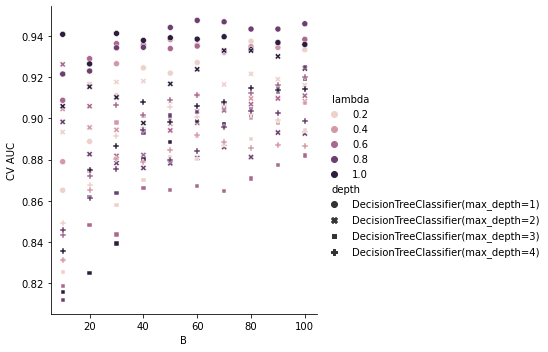

In [191]:
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "auc": search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "auc",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV AUC"
    
);
plt.show()

In [192]:
# Best CV AUC
search.best_score_

0.9475965095530313

In [193]:
# Training accuracy
accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

0.98

In [194]:
# Best estimator
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
     

In [195]:
# Final AUC on the test set
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.8980329185066238

In [196]:
# Final classification accuracy on the test set
accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.81

So the out-of-sample performance on the test set evaluated by AUC for classification tree, random forest, and boosting methods are 0.73, 0.85 and 0.90 respectively. And classification accuracy for classification tree, random forest, and boosting methods are 0.71, 0.77 and 0.81. It seems that boosting methods performs best on this dataset.